Dataset loaded successfully.

Performing K-Means clustering on 1000 samples...
Clustering complete.

--- Clustering Evaluation Metrics ---
Purity Score: 0.6080
Adjusted Rand Index (ARI): 0.4166
Normalized Mutual Information (NMI): 0.5357
------------------------------------

--- Aligning Cluster Labels ---
Cluster to True Label Mapping:
  Cluster 0 -> Mapped to Digit 6
  Cluster 1 -> Mapped to Digit 7
  Cluster 2 -> Mapped to Digit 3
  Cluster 3 -> Mapped to Digit 7
  Cluster 4 -> Mapped to Digit 6
  Cluster 5 -> Mapped to Digit 2
  Cluster 6 -> Mapped to Digit 8
  Cluster 7 -> Mapped to Digit 4
  Cluster 8 -> Mapped to Digit 1
  Cluster 9 -> Mapped to Digit 0

Final Accuracy after alignment: 0.6080
---------------------------------

Visualizing a few samples from each cluster (K-Means Result)...


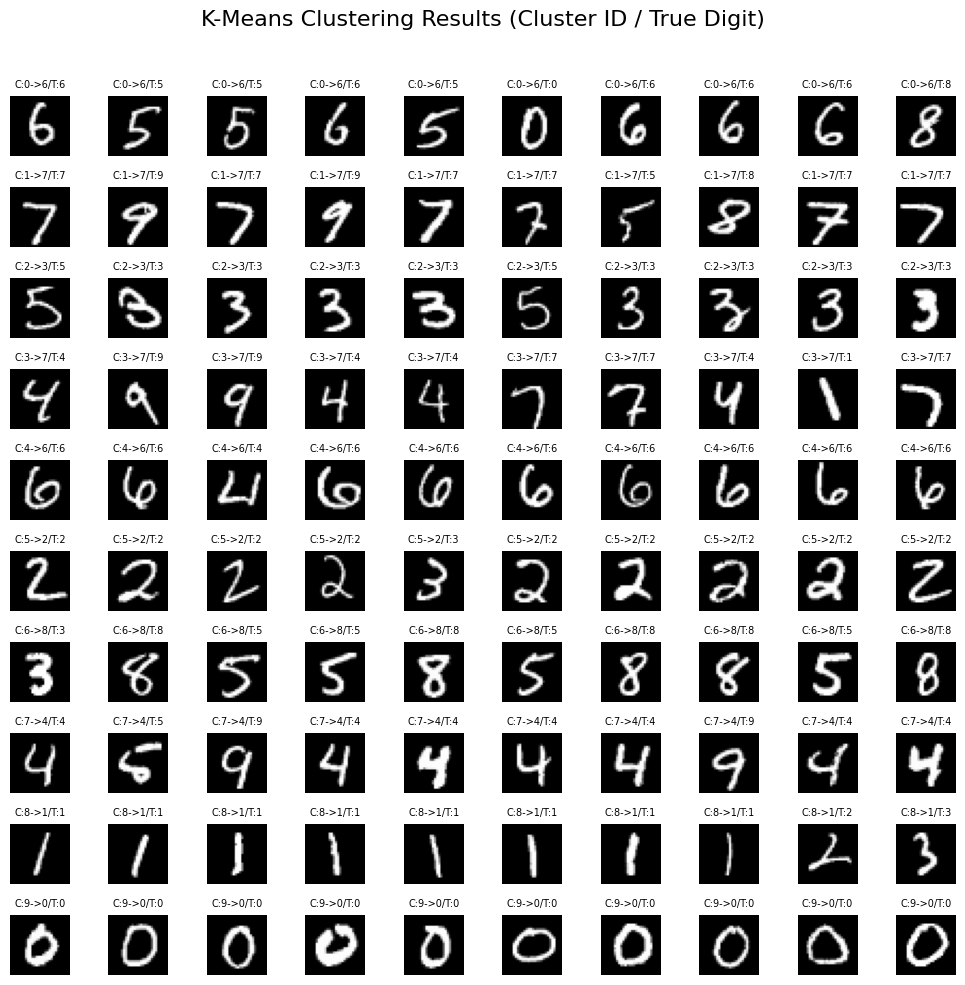


Visualizing a few samples based on their true labels (Ground Truth)...


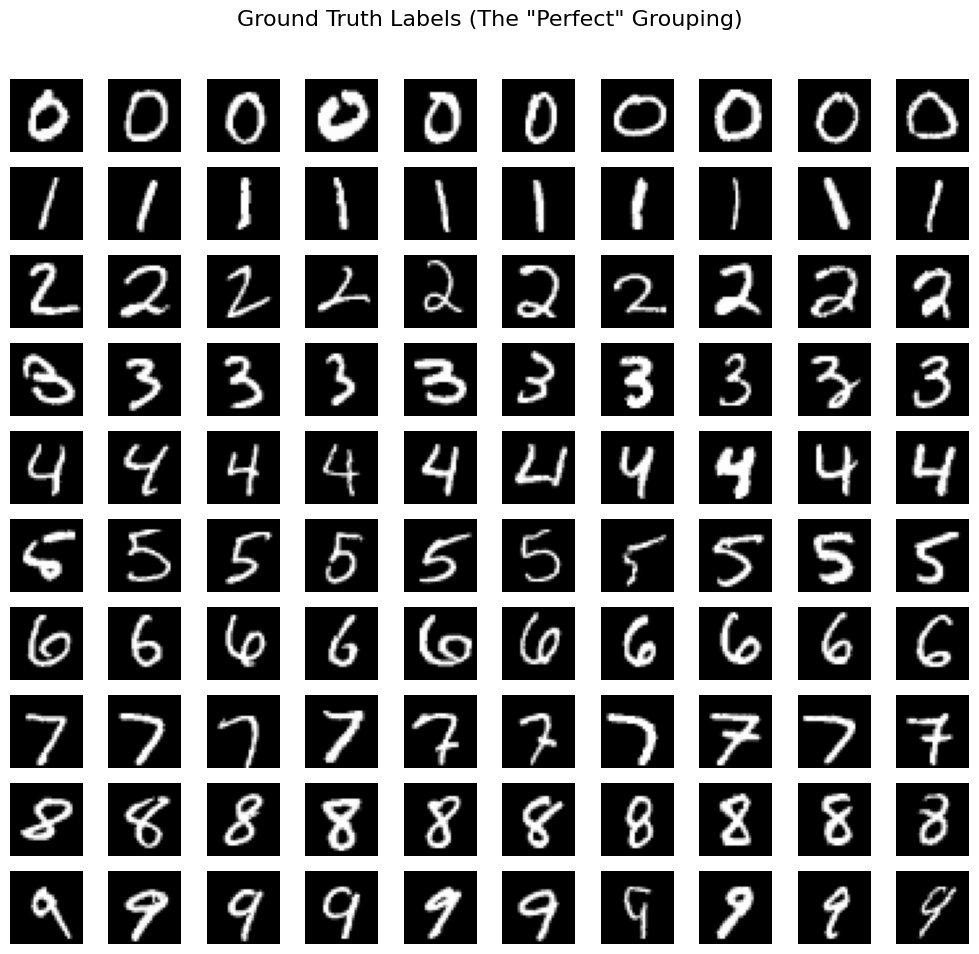

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, accuracy_score
from sklearn.metrics.cluster import contingency_matrix
import matplotlib.pyplot as plt
import tensorflow as tf

# Because Scikit-learn doesn't have a built-in function for the purity score, I'll create my own.
def purity_score(y_true, y_pred):
    mat = contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(mat, axis=0)) / np.sum(mat)


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print("Dataset loaded.")

# Selecting a subset of the test data (1000 samples) for faster processing.
num_samples = 1000
x_sample = x_test[:num_samples]
y_sample_true = y_test[:num_samples]
x_sample_flat = x_sample.reshape(num_samples, -1) / 255.0


# Perform K-Means Clustering
kmeans = KMeans(n_clusters=10, n_init=100, random_state=42)
y_sample_pred = kmeans.fit_predict(x_sample_flat)
print("Clustering complete.")


# Evaluation
purity = purity_score(y_sample_true, y_sample_pred)
print(f"Purity Score: {purity:.4f}")
ari = adjusted_rand_score(y_sample_true, y_sample_pred)
print(f"Adjusted Rand Index (ARI): {ari:.4f}")
nmi = normalized_mutual_info_score(y_sample_true, y_sample_pred)
print(f"Normalized Mutual Information (NMI): {nmi:.4f}")
print("------------------------------------")

# finding the most common true label for each cluster and use that as the new "name" for the cluster.
contingency = contingency_matrix(y_sample_true, y_sample_pred)
label_map = np.argmax(contingency, axis=0)

print("Cluster to True Label Mapping:")
for cluster_id, true_label in enumerate(label_map):
    print(f"  Cluster {cluster_id} -> Mapped to Digit {true_label}")

y_sample_aligned = np.array([label_map[c] for c in y_sample_pred])
accuracy = accuracy_score(y_sample_true, y_sample_aligned)
print(f"\nFinal Accuracy after alignment: {accuracy:.4f}")
print("---------------------------------")


# Visualization
fig, axes = plt.subplots(10, 10, figsize=(10, 10))
plt.suptitle('K-Means Clustering Results (Cluster ID / True Digit)', fontsize=16)

for cluster_id in range(10):
    cluster_indices = np.where(y_sample_pred == cluster_id)[0]
    for i in range(min(10, len(cluster_indices))):
        ax = axes[cluster_id, i]
        image_index = cluster_indices[i]
        ax.imshow(x_sample[image_index], cmap='gray')
        mapped_label = label_map[cluster_id]
        ax.set_title(f'C:{cluster_id}->{mapped_label}/T:{y_sample_true[image_index]}', fontsize=7)
        ax.axis('off')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

fig_true, axes_true = plt.subplots(10, 10, figsize=(10, 10))
plt.suptitle('Ground Truth Labels (The "Perfect" Grouping)', fontsize=16)

for true_label in range(10):
    label_indices = np.where(y_sample_true == true_label)[0]
    for i in range(min(10, len(label_indices))):
        ax = axes_true[true_label, i]
        image_index = label_indices[i]
        ax.imshow(x_sample[image_index], cmap='gray')
        ax.axis('off')
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

Clustering complete (using random initialization).

--- Clustering Evaluation Metrics ---
Purity Score: 0.6060
Adjusted Rand Index (ARI): 0.4139
Normalized Mutual Information (NMI): 0.5354
------------------------------------

--- Aligning Cluster Labels ---
Cluster to True Label Mapping:
  Cluster 0 -> Mapped to Digit 6
  Cluster 1 -> Mapped to Digit 3
  Cluster 2 -> Mapped to Digit 7
  Cluster 3 -> Mapped to Digit 7
  Cluster 4 -> Mapped to Digit 8
  Cluster 5 -> Mapped to Digit 4
  Cluster 6 -> Mapped to Digit 1
  Cluster 7 -> Mapped to Digit 2
  Cluster 8 -> Mapped to Digit 6
  Cluster 9 -> Mapped to Digit 0

Final Accuracy after alignment: 0.6060
---------------------------------

Visualizing a few samples from each cluster (K-Means Result)...


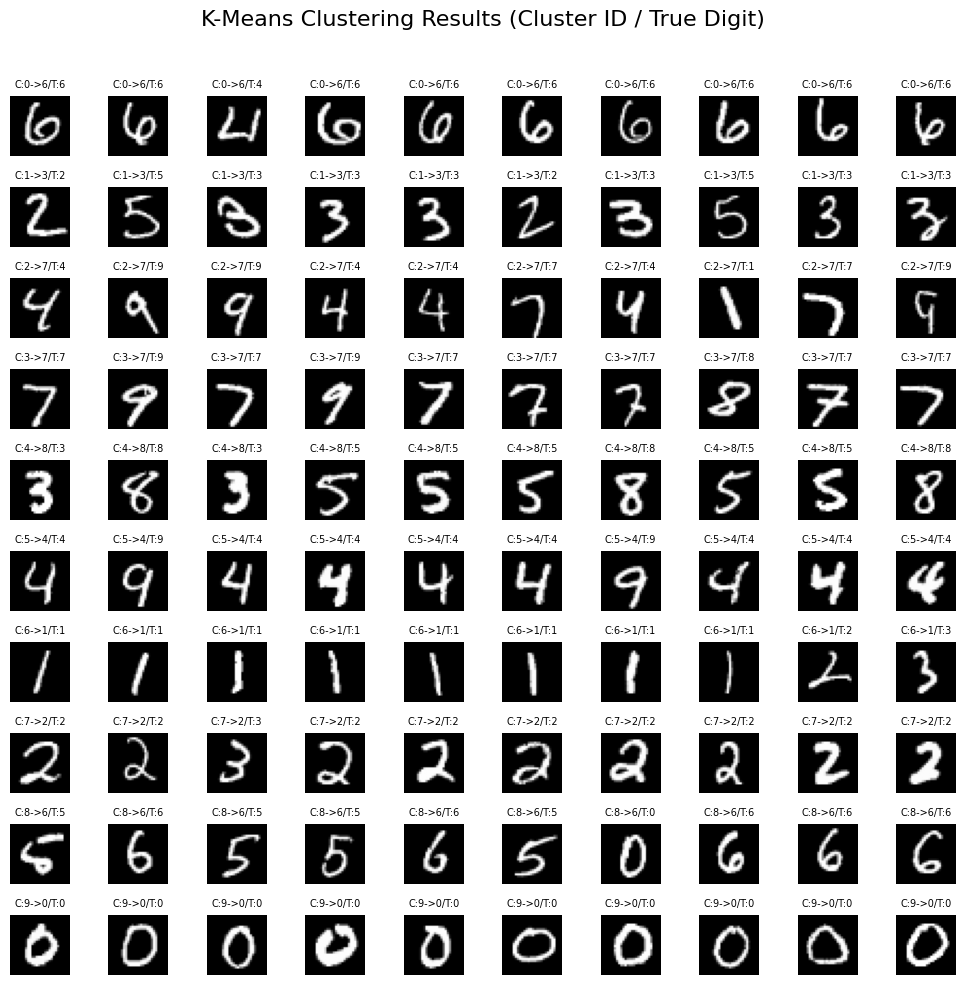


Visualizing a few samples based on their true labels (Ground Truth)...


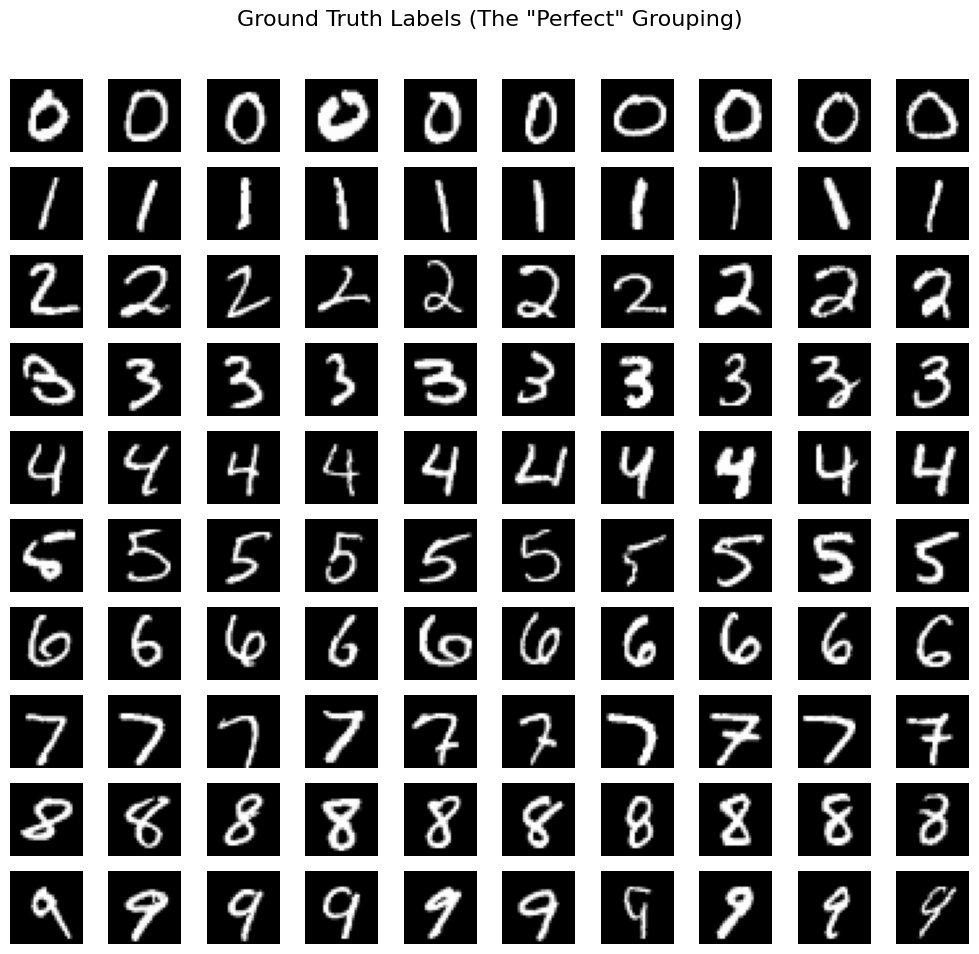

In [ ]:
# Trying completely random initialization of centroids

kmeans = KMeans(n_clusters=10, init='random', n_init=100, random_state=42)
y_sample_pred = kmeans.fit_predict(x_sample_flat)
print("Clustering complete.")
print("\n--- Clustering Evaluation Metrics ---")
purity = purity_score(y_sample_true, y_sample_pred)
print(f"Purity Score: {purity:.4f}")
ari = adjusted_rand_score(y_sample_true, y_sample_pred)
print(f"Adjusted Rand Index (ARI): {ari:.4f}")
nmi = normalized_mutual_info_score(y_sample_true, y_sample_pred)
print(f"Normalized Mutual Information (NMI): {nmi:.4f}")
print("------------------------------------")

print("\n--- Aligning Cluster Labels ---")
contingency = contingency_matrix(y_sample_true, y_sample_pred)
label_map = np.argmax(contingency, axis=0)

print("Cluster to True Label Mapping:")
for cluster_id, true_label in enumerate(label_map):
    print(f"  Cluster {cluster_id} -> Mapped to Digit {true_label}")
y_sample_aligned = np.array([label_map[c] for c in y_sample_pred])
accuracy = accuracy_score(y_sample_true, y_sample_aligned)
print(f"\nFinal Accuracy after alignment: {accuracy:.4f}")
print("---------------------------------")

print("\nVisualizing a few samples from each cluster (K-Means Result)...")

fig, axes = plt.subplots(10, 10, figsize=(10, 10))
plt.suptitle('K-Means Clustering Results (Cluster ID / True Digit)', fontsize=16)

for cluster_id in range(10):
    cluster_indices = np.where(y_sample_pred == cluster_id)[0]
    for i in range(min(10, len(cluster_indices))):
        ax = axes[cluster_id, i]
        image_index = cluster_indices[i]
        ax.imshow(x_sample[image_index], cmap='gray')
        mapped_label = label_map[cluster_id]
        ax.set_title(f'C:{cluster_id}->{mapped_label}/T:{y_sample_true[image_index]}', fontsize=7)
        ax.axis('off')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

print("\nVisualizing a few samples based on their true labels (Ground Truth)...")

fig_true, axes_true = plt.subplots(10, 10, figsize=(10, 10))
plt.suptitle('Ground Truth Labels (The "Perfect" Grouping)', fontsize=16)

for true_label in range(10):
    label_indices = np.where(y_sample_true == true_label)[0]
    for i in range(min(10, len(label_indices))):
        ax = axes_true[true_label, i]
        image_index = label_indices[i]
        ax.imshow(x_sample[image_index], cmap='gray')
        ax.axis('off')
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

Clustering complete (using one image per label as initial centroids).

--- Clustering Evaluation Metrics ---
Purity Score: 0.6420
Adjusted Rand Index (ARI): 0.4425
Normalized Mutual Information (NMI): 0.5463
------------------------------------

--- Aligning Cluster Labels ---
Cluster to True Label Mapping:
  Cluster 0 -> Mapped to Digit 0
  Cluster 1 -> Mapped to Digit 1
  Cluster 2 -> Mapped to Digit 2
  Cluster 3 -> Mapped to Digit 3
  Cluster 4 -> Mapped to Digit 4
  Cluster 5 -> Mapped to Digit 7
  Cluster 6 -> Mapped to Digit 6
  Cluster 7 -> Mapped to Digit 7
  Cluster 8 -> Mapped to Digit 8
  Cluster 9 -> Mapped to Digit 9

Final Accuracy after alignment: 0.6420
---------------------------------

Visualizing a few samples from each cluster (K-Means Result)...


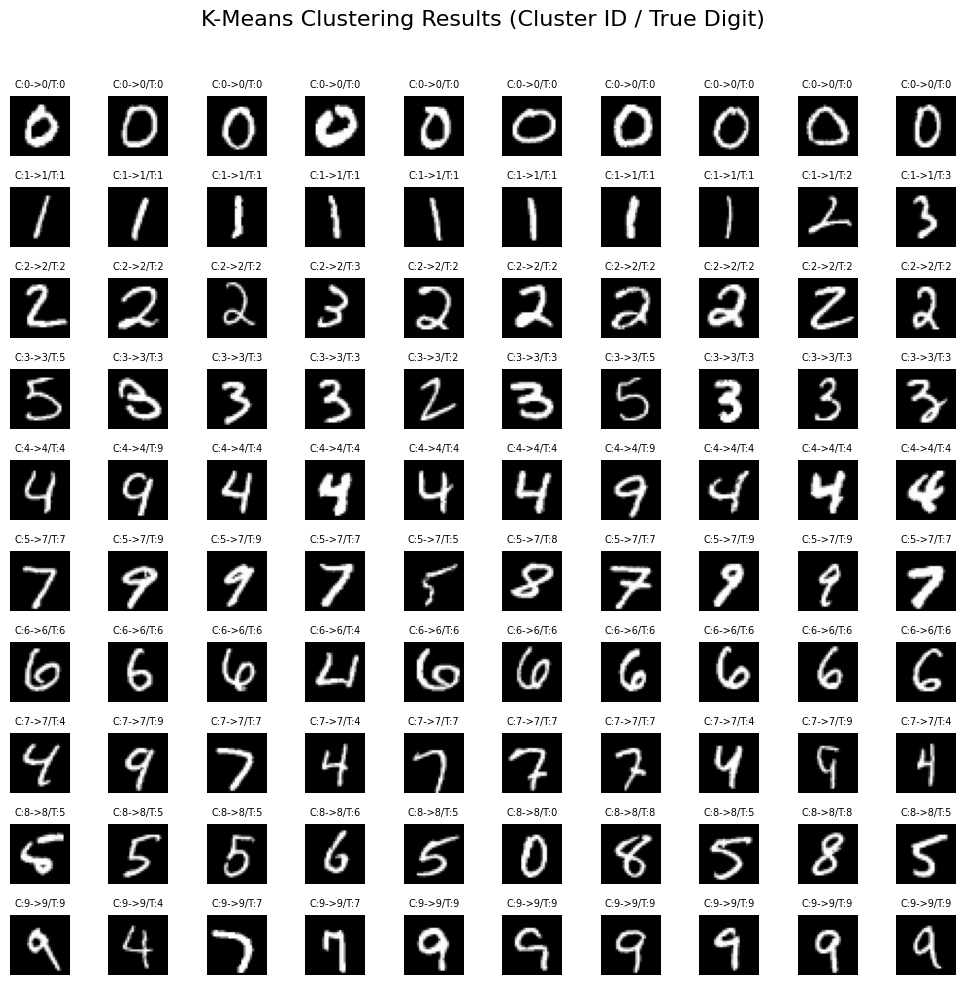


Visualizing a few samples based on their true labels (Ground Truth)...


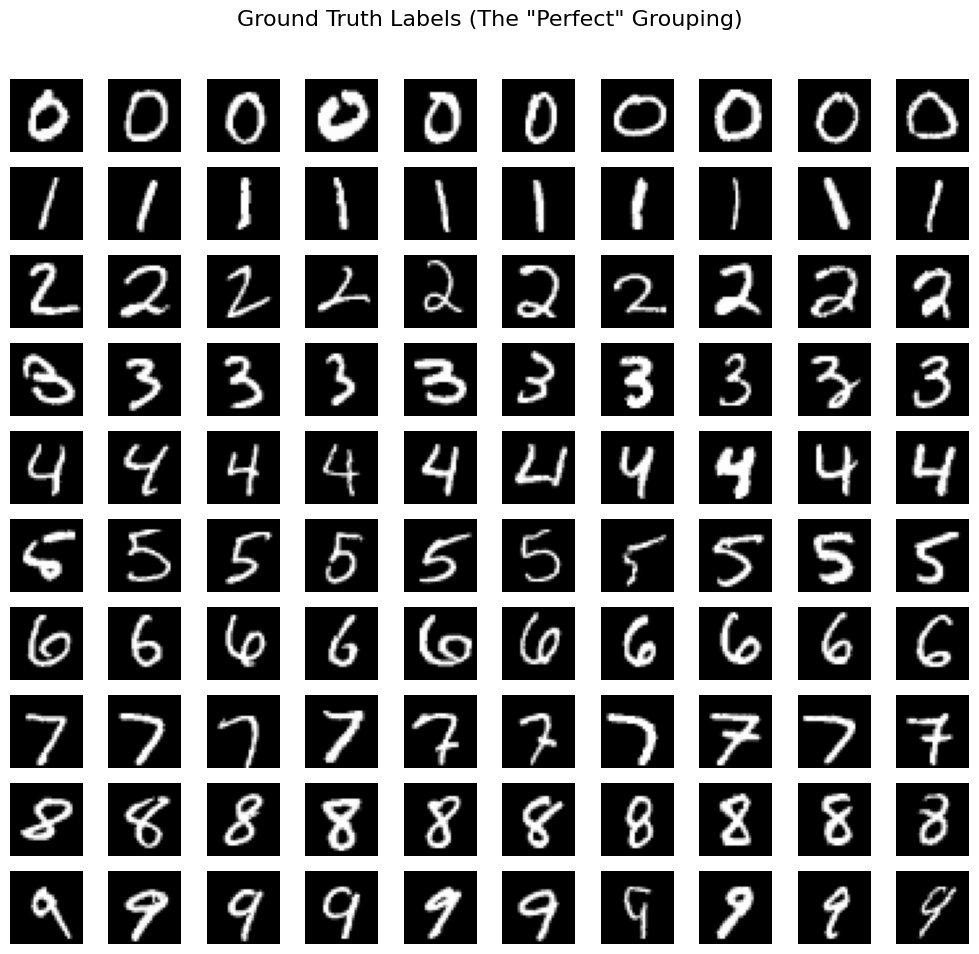

In [ ]:
# Custom centroid initialization
# One image (flattened) per true label 0–9 as the initial centroid
init_centroids = []

for digit in range(10):
    indices = np.where(y_sample_true == digit)[0]
    sample_index = np.random.choice(indices)
    init_centroids.append(x_sample_flat[sample_index])
init_centroids = np.array(init_centroids)
kmeans = KMeans(
    n_clusters=10,
    init=init_centroids,
    n_init=1
)

y_sample_pred = kmeans.fit_predict(x_sample_flat)
print("Clustering complete (using one image per label as initial centroids).")

print("\n--- Clustering Evaluation Metrics ---")
purity = purity_score(y_sample_true, y_sample_pred)
print(f"Purity Score: {purity:.4f}")
ari = adjusted_rand_score(y_sample_true, y_sample_pred)
print(f"Adjusted Rand Index (ARI): {ari:.4f}")
nmi = normalized_mutual_info_score(y_sample_true, y_sample_pred)
print(f"Normalized Mutual Information (NMI): {nmi:.4f}")
print("------------------------------------")

print("\n--- Aligning Cluster Labels ---")
contingency = contingency_matrix(y_sample_true, y_sample_pred)
label_map = np.argmax(contingency, axis=0)

print("Cluster to True Label Mapping:")
for cluster_id, true_label in enumerate(label_map):
    print(f"  Cluster {cluster_id} -> Mapped to Digit {true_label}")
y_sample_aligned = np.array([label_map[c] for c in y_sample_pred])
accuracy = accuracy_score(y_sample_true, y_sample_aligned)
print(f"\nFinal Accuracy after alignment: {accuracy:.4f}")
print("---------------------------------")

print("\nVisualizing a few samples from each cluster (K-Means Result)...")

fig, axes = plt.subplots(10, 10, figsize=(10, 10))
plt.suptitle('K-Means Clustering Results (Cluster ID / True Digit)', fontsize=16)

for cluster_id in range(10):
    cluster_indices = np.where(y_sample_pred == cluster_id)[0]
    for i in range(min(10, len(cluster_indices))):
        ax = axes[cluster_id, i]
        image_index = cluster_indices[i]
        ax.imshow(x_sample[image_index], cmap='gray')
        mapped_label = label_map[cluster_id]
        ax.set_title(f'C:{cluster_id}->{mapped_label}/T:{y_sample_true[image_index]}', fontsize=7)
        ax.axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


print("\nVisualizing a few samples based on their true labels (Ground Truth)...")

fig_true, axes_true = plt.subplots(10, 10, figsize=(10, 10))
plt.suptitle('Ground Truth Labels (The "Perfect" Grouping)', fontsize=16)

for true_label in range(10):
    label_indices = np.where(y_sample_true == true_label)[0]

    for i in range(min(10, len(label_indices))):
        ax = axes_true[true_label, i]
        image_index = label_indices[i]
        ax.imshow(x_sample[image_index], cmap='gray')
        ax.axis('off')
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()


Running the Elbow Method experiment...
Fitting KMeans with K=2...
Fitting KMeans with K=4...
Fitting KMeans with K=6...
Fitting KMeans with K=8...
Fitting KMeans with K=10...
Fitting KMeans with K=12...
Fitting KMeans with K=14...
Fitting KMeans with K=16...


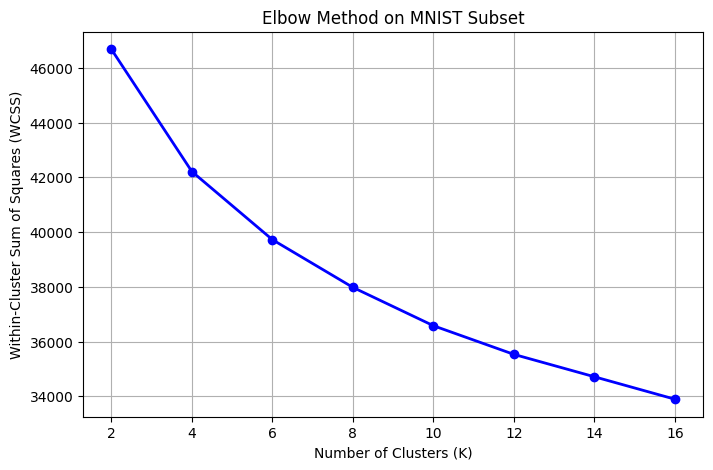


WCSS values for each K:
K=2: WCSS=46679.05
K=4: WCSS=42211.86
K=6: WCSS=39723.17
K=8: WCSS=37979.35
K=10: WCSS=36579.60
K=12: WCSS=35532.20
K=14: WCSS=34714.24
K=16: WCSS=33894.66


In [ ]:
# Elbow Method to Identify Optimal K
# This section tests whether the Elbow Method can correctly estimate K to be near 10.

print("\nRunning the Elbow Method experiment...")

K_values = [2, 4, 6, 8, 10, 12, 14, 16]
wcss = []

for k in K_values:
    print(f"Fitting KMeans with K={k}...")
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=20, max_iter=300, random_state=42)
    kmeans.fit(x_sample_flat)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_values, wcss, 'bo-', linewidth=2, markersize=6)
plt.title("Elbow Method on MNIST Subset")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.grid(True)
plt.show()

print("\nWCSS values for each K:")
for k, val in zip(K_values, wcss):
    print(f"K={k}: WCSS={val:.2f}")

In [ ]:
!pip install kneed

In [ ]:
# Additional step to find K because the elbow curve is smooth and so unable to determine the k precisely (in elbow k: 6-8)
from kneed import KneeLocator

# The K_values used in the previous Elbow Method cell were [2, 4, 6, 8, 10, 12, 14, 16]
k_values = [2, 4, 6, 8, 10, 12, 14, 16]

kl = KneeLocator(k_values, wcss, curve="convex", direction="decreasing")
print("Elbow at K =", kl.elbow)

Elbow at K = 6
